In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests

In [2]:
df = pd.read_csv("C:\\Users\\Rajesh Singh\\Downloads\\data.csv")

In [3]:
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


## a. . Measure the dispersion in both and interpret the results.

In [5]:
df.describe()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
count,100.000000,100.000000,100.000000
mean,50.500000,133.910000,128.360000
std,29.011492,6.598278,6.888022
min,1.000000,120.000000,118.000000
25%,25.750000,128.000000,123.000000
50%,50.500000,135.000000,128.000000
75%,75.250000,139.250000,135.000000
max,100.000000,148.000000,141.000000


### Blood Pressure Before (mmHg)

**range**

In [15]:
#Range of "Blood Pressure Before (mmHg)"
df[" Blood Pressure Before (mmHg)"].max()

148

In [16]:
df[" Blood Pressure Before (mmHg)"].min()

120

In [19]:
Range_BP_before = df[" Blood Pressure Before (mmHg)"].max()- df[" Blood Pressure Before (mmHg)"].min()

In [20]:
Range_BP_before

28

**Variance**

In [21]:
df[" Blood Pressure Before (mmHg)"].var()

43.53727272727271

**Standard deviation**

In [22]:
df[" Blood Pressure Before (mmHg)"].std()

6.598278012275075

### Blood Pressure After (mmHg)

**range**

In [24]:
#Range of "Blood Pressure Before (mmHg)"
df[" Blood Pressure After (mmHg)"].max()

141

In [25]:
df[" Blood Pressure After (mmHg)"].min()

118

In [26]:
Range_BP_after = df[" Blood Pressure After (mmHg)"].max()- df[" Blood Pressure After (mmHg)"].min()

In [27]:
Range_BP_after

23

In [ ]:
**Variance**

In [28]:
df[" Blood Pressure After (mmHg)"].var()

47.4448484848485

In [ ]:
**Standard deviation**

In [29]:
df[" Blood Pressure After (mmHg)"].std()

6.8880221025232276

## b. Calculate mean and 5% confidence interval and plot it in a graph


In [31]:
import scipy.stats as stats

column_data = df[' Blood Pressure Before (mmHg)']
mean = column_data.mean()
confidence_interval = stats.t.interval(0.95, len(column_data)-1, loc=mean, scale=stats.sem(column_data))    ##`0.95` iss the confidence level, `len(column_data)-1` is dof, `loc = mean` sets location parameter of the interval, which is mean value, it represents center of the confidence interval, `scale= stats.sem(column_data) This parameter sets the scale parameter of the interval, which is the standard error of the mean (SEM). 

print("Mean:", mean)
print("Confidence Interval:", confidence_interval)

Mean: 133.91
Confidence Interval: (132.60075849172767, 135.21924150827232)


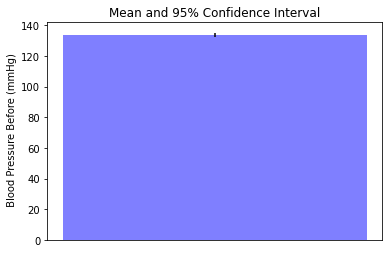

In [32]:
plt.bar(0, mean, yerr=(confidence_interval[1] - mean), color='blue', alpha=0.5)
plt.xticks([])
plt.ylabel(' Blood Pressure Before (mmHg)')
plt.title('Mean and 95% Confidence Interval')
plt.show()

In [33]:
import scipy.stats as stats

column_data = df[' Blood Pressure After (mmHg)']
mean = column_data.mean()
confidence_interval = stats.t.interval(0.95, len(column_data)-1, loc=mean, scale=stats.sem(column_data))    ##`0.95` iss the confidence level, `len(column_data)-1` is dof, `loc = mean` sets location parameter of the interval, which is mean value, it represents center of the confidence interval, `scale= stats.sem(column_data) This parameter sets the scale parameter of the interval, which is the standard error of the mean (SEM). 

print("Mean:", mean)
print("Confidence Interval:", confidence_interval)

Mean: 128.36
Confidence Interval: (126.99326697818071, 129.7267330218193)


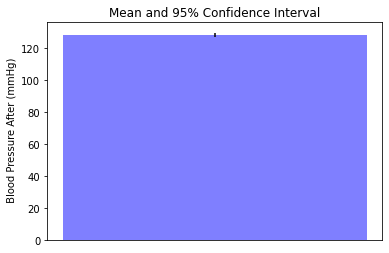

In [34]:
plt.bar(0, mean, yerr=(confidence_interval[1] - mean), color='blue', alpha=0.5)
plt.xticks([])
plt.ylabel(' Blood Pressure After (mmHg)')
plt.title('Mean and 95% Confidence Interval')
plt.show()

## c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.


* **Mean Absolute Deviation (MAD)**: The MAD gives you an idea of the average deviation of data points from the mean. A larger MAD indicates higher variability in the dataset, meaning that the data points are more spread out from the mean.
* **Standard Deviation (SD)**: The standard deviation provides a measure of the dispersion of data points from the mean. A larger standard deviation indicates a wider spread of data points, suggesting greater variability in the dataset.



In [35]:
data = df[' Blood Pressure Before (mmHg)']

# Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(data - np.mean(data)))

# Standard Deviation (SD)
sd = np.std(data)

print("Mean Absolute Deviation (MAD):", mad)
print("Standard Deviation (SD):", sd)

Mean Absolute Deviation (MAD): 5.7118
Standard Deviation (SD): 6.5652037287505385


In [36]:
data = df[' Blood Pressure After (mmHg)']

# Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(data - np.mean(data)))

# Standard Deviation (SD)
sd = np.std(data)

print("Mean Absolute Deviation (MAD):", mad)
print("Standard Deviation (SD):", sd)

Mean Absolute Deviation (MAD): 5.9
Standard Deviation (SD): 6.853495458523338


## d. . Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [37]:
from scipy.stats import pearsonr

data1 = df[' Blood Pressure Before (mmHg)']
data2 = df[' Blood Pressure After (mmHg)']

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(data1, data2)

print("Correlation coefficient:", correlation)
print("p-value:", p_value)

# Check significance at 1% level
if p_value < 0.01:
    print("The correlation is significant at the 1% level.")
else:
    print("The correlation is not significant at the 1% level.")

Correlation coefficient: 0.9779485966556021
p-value: 1.8097381433059864e-68
The correlation is significant at the 1% level.
